In [118]:
import numpy as np
import pandas as pd
import Data as df

In [2]:
input_len = 2
hidden_layer = 4

kal = np.ones((input_len,hidden_layer))
x = np.array([[1,2]])

print("@,*,matmul,outer")
print("Expected shape -->", (hidden_layer,hidden_layer))
print(np.shape(x@kal))
print(np.shape(np.matmul(x,kal)))
print(np.shape(np.outer(x,kal)))

print("kal", kal, "\n X", x , "\n kal*x", x@kal)

@,*,matmul,outer
Expected shape --> (4, 4)
(1, 4)
(1, 4)
(2, 8)
kal [[1. 1. 1. 1.]
 [1. 1. 1. 1.]] 
 X [[1 2]] 
 kal*x [[3. 3. 3. 3.]]


In [21]:
np.random.randn(2,4)

array([[ 0.24185207, -0.07738701,  0.74592264,  1.27135676],
       [-0.39983886,  0.99811923, -0.51398913, -0.44489523]])

In [123]:
# 2nd 

class RNN:
    def __init__(self,vocab_len,output_len,hidden_size =15):
        self.Wya = np.random.randn(output_len,hidden_size)/1000
        self.Wax = np.random.randn(hidden_size,vocab_len)/1000
        self.Waa = np.random.randn(hidden_size,hidden_size)/1000

        self.by = np.zeros((output_len,1))
        self.ba = np.zeros((hidden_size,1))
        
        
    def forward_prop(self,sentences):
        
        self.last_as = [0]*len(sentences)
        a =  np.zeros((self.Waa.shape[0], 1))
        self.last_as = { 0: a }
        self.last_sentences = sentences

        for i ,x in enumerate(sentences):
            #print("---self.Wax*x--",np.shape(np.matmul(self.Wax,x)))
            a = np.tanh(np.matmul(self.Wax,x) + np.matmul(self.Waa,a) + self.ba)
            # Store the a for backprop
            self.last_as[i+1] = a 

        
        #Store the inputs for backprop

        y = np.matmul(self.Wya,a) + self.by
        
        return y, a


    def back_prop(self,dL_dy,learning_rate = 0.005):
        dWya =  np.zeros(self.Wya.shape)
        dWax =  np.zeros(self.Wax.shape)
        dWaa =  np.zeros(self.Waa.shape)
        dby  =  np.zeros(self.by.shape)
        dba  =  np.zeros(self.ba.shape)

        n = len(self.last_sentences)
        dWya = np.matmul(dL_dy,self.last_as[n].T)
        dby = dL_dy
        
        temp = 1
        dh = np.matmul(self.Wya.T,dL_dy)
        
        for i in reversed(range(n)):
            temp =((1 - self.last_as[i + 1] ** 2))
            temp = temp*dh
            dWaa += temp @ self.last_as[i].T
            dWax += np.matmul(temp,self.last_sentences[i].T)

            dba  += temp
            dh = np.matmul(self.Waa.T,temp)
        
        #   Exploding and Vanishing Gradient problem 
        #   Work around the solution
        for d in [dWax, dWaa, dWya, dba, dby]:
            np.clip(d, -1, 1, out=d)

        self.Wax = self.Wax  - learning_rate*dWax
        self.Waa = self.Waa  - learning_rate*dWaa
        self.Wya = self.Wya  - learning_rate*dWya

        self.by =  self.by -learning_rate*dby
        self.ba =  self.ba -learning_rate*dba 

In [124]:
df.vocab_size = len(df.word_to_idx)
rnn = RNN(df.vocab_size, 1)

In [125]:
def softmax(xs):
  # Applies the Softmax Function to the input array.
  return np.exp(xs) / sum(np.exp(xs))

In [126]:
# Initialize our RNN!

rnn = RNN(df.vocab_size, 2)

def processData(data, backprop=True):
  '''
  Returns the RNN's loss and accuracy for the given data.
  - data is a dictionary mapping text to True or False.
  - backprop determines if the backward phase should be run.
  '''
  items = list(data.items())
  np.random.shuffle(items)

  loss = 0
  num_correct = 0
  i = 0
  for x, y in items:
    inputs = df.createInputs(x)    
    i = i +1
    #print(i,x)
    target = int(y)

    # Forward
    out, _ = rnn.forward_prop(inputs)
    probs = softmax(out)
    # Calculate loss / accuracy
    loss -= np.log(probs[target])

    #If Classification
    num_correct += int(np.argmax(probs) == target)

    #If regression

    if backprop:
        # Build dL/dy
        d_L_d_y = probs
        #print("Input >>>>",inputs,"Targets >>>>" ,target, "Probs >>>>",probs)
        d_L_d_y[target] -= 1
        #Softmax derivative

        # Backward
        #print("???",d_L_d_y)
        rnn.back_prop(d_L_d_y)

  return loss / len(data),   num_correct / len(data)

# Training loop
for epoch in range(1000):
  train_loss, train_acc = processData(df.train_data)

  if epoch % 100 == 99:
    print('--- Epoch %d' % (epoch + 1))
    print('Train:\tLoss %.3f | Accuracy: %.3f' % (train_loss, train_acc))

    test_loss, test_acc = processData(df.test_data, backprop=False)
    print('Test:\tLoss %.3f | Accuracy: %.3f' % (test_loss, test_acc))

--- Epoch 100
Train:	Loss 0.689 | Accuracy: 0.552
Test:	Loss 0.699 | Accuracy: 0.500
--- Epoch 200
Train:	Loss 0.689 | Accuracy: 0.552
Test:	Loss 0.698 | Accuracy: 0.500
--- Epoch 300
Train:	Loss 0.688 | Accuracy: 0.552
Test:	Loss 0.698 | Accuracy: 0.500
--- Epoch 400
Train:	Loss 0.685 | Accuracy: 0.552
Test:	Loss 0.697 | Accuracy: 0.500
--- Epoch 500
Train:	Loss 0.678 | Accuracy: 0.569
Test:	Loss 0.701 | Accuracy: 0.500
--- Epoch 600
Train:	Loss 0.670 | Accuracy: 0.569
Test:	Loss 0.718 | Accuracy: 0.450
--- Epoch 700
Train:	Loss 0.564 | Accuracy: 0.828
Test:	Loss 0.661 | Accuracy: 0.700
--- Epoch 800
Train:	Loss 0.349 | Accuracy: 0.879
Test:	Loss 0.449 | Accuracy: 0.800
--- Epoch 900
Train:	Loss 0.169 | Accuracy: 0.966
Test:	Loss 0.268 | Accuracy: 0.950
--- Epoch 1000
Train:	Loss 0.075 | Accuracy: 0.983
Test:	Loss 0.122 | Accuracy: 0.950


In [ ]:
def linear(xs):
  # Applies the Softmax Function to the input array.
  return xs

In [97]:
# 2nd 

class RNN:
    def __init__(self,vocab_len,output_len,hidden_size =15):
        self.Wya = np.random.randn(output_len,hidden_size)/1000
        self.Wax = np.random.randn(hidden_size,vocab_len)/1000
        self.Waa = np.random.randn(hidden_size,hidden_size)/1000

        self.by = np.zeros((output_len,1))
        self.ba = np.zeros((hidden_size,1))
        
        
    def forward_prop(self,sentences):
       
        self.last_as = [0]*len(sentences)
        a =  np.zeros((self.Waa.shape[0], 1))
        self.last_as = { 0: a }
        self.last_sentences = sentences

        for i ,x in enumerate(sentences):
            # x value of the input
            # i sequance of the input

            #print("**** sentences",sentences)
            #print("i",i,"x",x, "x ttype", type(x))
            #print("Wax || ",np.shape(self.Wax),"  x",np.shape(x))
            ##print("------",np.shape((x@self.Wax)))
            #print("------",np.shape(self.Wax@x)),np.shape(x)
            #print("@@@@@ ---> ",np.shape(self.Wax),np.shape(x))
            #print("matmul ---->" )
            #print("***** ---> ",self.Wax*x)
            a = np.tanh(self.Wax*x + np.matmul(self.Waa,a) + self.ba)
            # Store the a for backprop
            self.last_as[i+1] = a 

        
        #Store the inputs for backprop

        y = np.matmul(self.Wya,a) + self.by
        
        
        return y, a


    def back_prop(self,dL_dy,learning_rate = 0.005):
        dWya =  np.zeros(self.Wya.shape)
        dWax =  np.zeros(self.Wax.shape)
        dWaa =  np.zeros(self.Waa.shape)
        dby  =  np.zeros(self.by.shape)
        dba  =  np.zeros(self.ba.shape)

        n = len(self.last_sentences)
        #print(np.shape(dL_dy[0]),np.shape(self.last_as[n].T))
        
        print("Last Inputs x -->", self.last_as[0].T)
        dWya = dL_dy[0]*self.last_as[n].T
        dby = dL_dy
        
        temp = 1
        dh = np.matmul(self.Wya.T,dL_dy)
        
        for i in reversed(range(n)):
            temp =((1 - self.last_as[i + 1] ** 2))

            temp = temp*dh
            print("Temp Shape --->",np.shape(temp))
            print("last sentences --->",np.shape(self.last_sentences.T))
            print("last sentences --->",self.last_sentences[i].T)
            dWaa += temp * self.last_as[i].T
            dWax += np.matmul(temp,self.last_sentences[i].T)

            dba  += temp
            dh = np.matmul(self.Waa.T,temp)
        
        #   Exploding and Vanishing Gradient problem 
        #   Work around the solution
        for d in [dWax, dWaa, dWya, dba, dby]:
            np.clip(d, -1, 1, out=d)

        self.Wax = self.Wax  - learning_rate*dWax
        self.Waa = self.Waa  - learning_rate*dWaa
        self.Wya = self.Wya  - learning_rate*dWya

        self.by =  self.by -learning_rate*dby
        self.ba =  self.ba -learning_rate*dba 

In [58]:
def linear(xs):
  # Applies the Softmax Function to the input array.
  return xs

In [98]:
# Initialize our RNN!

rnn = RNN(1, 2)

def processData(data,refernce ,backprop=True):
  '''
  Returns the RNN's loss and accuracy for the given data.
  - data is a dictionary mapping text to True or False.
  - backprop determines if the backward phase should be run.
  '''
  items = data

  loss = 0
  num_correct = 0

  for x in range (len(items)):
    inputs = items[x]  
    target = refernce[x]
    #print("Input >>>>",inputs,"Targets >>>>", target)
    # Forward
    out, _ = rnn.forward_prop(inputs)

    probs = linear(out)
    #print("Probs >>>>",probs,np.shape(probs))
    # Calculate loss / accuracy
    loss += (target-probs[0])**2

    #If Classification
    #num_correct += int(np.argmax(probs) == target)

    if backprop:
        # Build dL/dy
        d_L_d_y = -2*(target-probs)

        # Backward
        rnn.back_prop(d_L_d_y[0])

  return loss / len(data),   num_correct / len(data)

# Training loop
for epoch in range(1000):
  train_loss, train_acc = processData(data = every_input, refernce=RX_Q_to_train )

  if epoch % 100 == 99:
    print('--- Epoch %d' % (epoch + 1))
    print('Train:\tLoss %.3f | Accuracy: %.3f' % (train_loss, train_acc))

    test_loss, test_acc = processData(df.test_data, backprop=False)
    print('Test:\tLoss %.3f | Accuracy: %.3f' % (test_loss, test_acc))

selfas --> {0: array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 1: array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 2: array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 3: array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 4: array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
   

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [ ]:
df.train_data

In [57]:
for epoch in range(1000):
  train_loss, train_acc = processData(df.train_data)

  if epoch % 100 == 99:
    print('--- Epoch %d' % (epoch + 1))
    print('Train:\tLoss %.3f | Accuracy: %.3f' % (train_loss, train_acc))

    test_loss, test_acc = processData(df.test_data, backprop=False)
    print('Test:\tLoss %.3f | Accuracy: %.3f' % (test_loss, test_acc))

TypeError: processData() missing 1 required positional argument: 'refernce'

In [56]:
RX_Q_to_train = RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay]
RX_Q_to_train_2 = -RX_Q_to_train
RX_Q_to_train = np.concatenate((RX_Q_to_train,RX_Q_to_train_2),axis=1)

In [52]:
import scipy.io
import RLS
f = scipy.io.loadmat('RLS_DATA.mat')
delay = 300
vars = f.keys()

data_size = f.get("RX_I").size

RX_Q_data = f.get("RX_Q")
RX_I_data = f.get("RX_I")
TX_Q_data = f.get("TX_Q")
TX_I_data = f.get("TX_I")

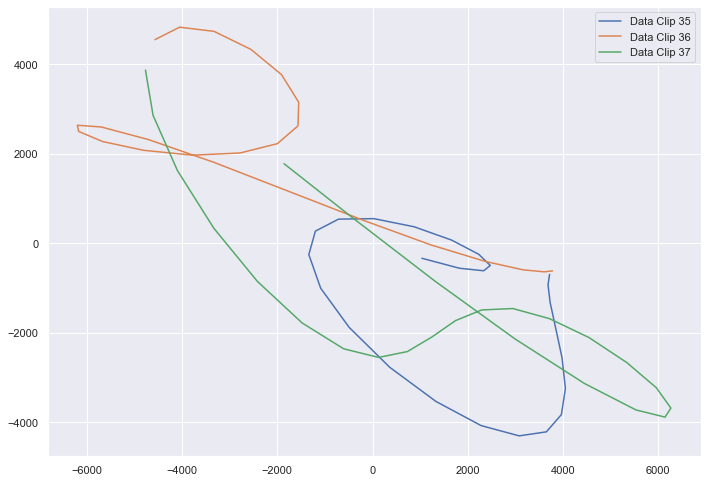

In [53]:
import matplotlib.pylab as plt
import math
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

est_per = 25
num_test = 3
inital_clip = 35
end_clip = inital_clip+num_test

line_refernce = np.linspace(0,est_per,est_per)

for i in range (inital_clip,end_clip):
    plt.plot(TX_Q_data[i*est_per:(i+1)*(est_per)],RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay],    label='Data Clip {}'.format(i))  

#plt.step(line_refernce,np.squeeze(every_pure_input).T[0:test_size][0],label='Pure_Input')      
#plt.step(line_refernce, every_input[0:test_size],label='Curropted Signal') 
#plt.step(line_refernce,every_input[0:test_size],label='Input Signals After The Channels')       
plt.legend()

In [54]:
def generate_input(data,mem_len,test_size):
    every_input     = np.zeros((test_size,mem_len))
    avilable_input  = np.zeros(mem_len)

    for k in range (mem_len):
        data = np.insert(data,0,0)

    for j in range (test_size):
        for i in range (mem_len):
            avilable_input[i] = data[j+i]
        every_input[j] = avilable_input
    
    print(len(every_input))


    return every_input 

In [55]:
i = 0
every_input = generate_input(TX_Q_data[i*est_per:(i+1)*(est_per)],4,len(TX_Q_data[i:(i+1)*(est_per)]))

25
